In [38]:
import yfinance as yf

In [39]:
btc = yf.download('BTC-USD', start='2020-01-01', end='2025-04-30')

[*********************100%***********************]  1 of 1 completed


In [40]:
btc

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...
2025-04-25,94720.500000,95768.390625,92898.593750,93954.250000,40915232364
2025-04-26,94646.929688,95251.359375,93927.250000,94714.648438,17612825123


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

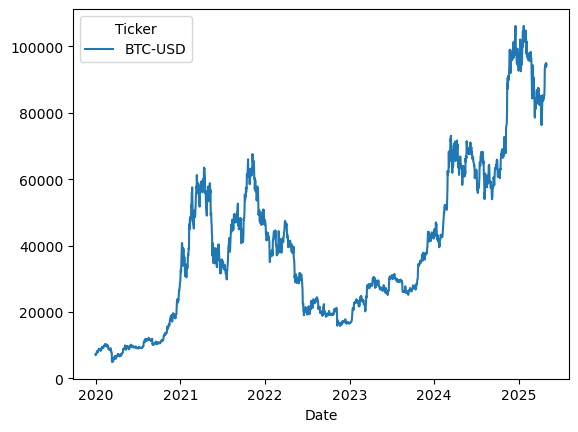

In [42]:
sns.lineplot(btc['Close'])
plt.show()

In [43]:
btc['log_return'] = np.log(btc['Close'] / btc['Close'].shift(1))
btc['SMA_7'] = btc['Close'].rolling(window=7).mean()
btc['SMA_30'] = btc['Close'].rolling(window=30).mean()

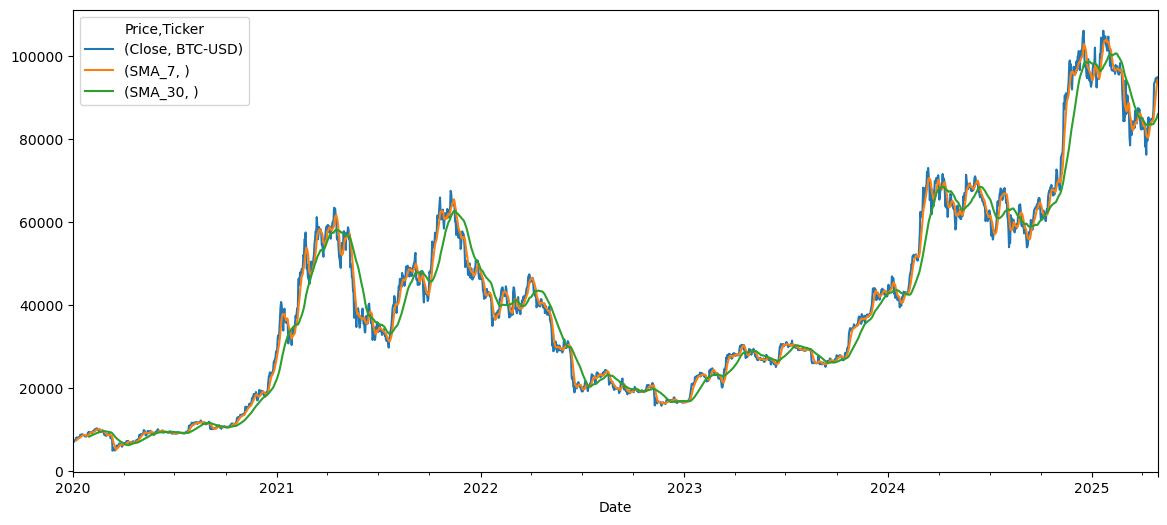

In [44]:
btc[['Close', 'SMA_7', 'SMA_30']].plot(figsize=(14,6))
plt.show()

In [45]:
btc['Position'] = 0
btc.loc[btc['SMA_7'] > btc['SMA_30'], 'Position'] = 1
btc.loc[btc['SMA_7'] < btc['SMA_30'], 'Position'] = -1

In [46]:
intitial_capital = 1000
btc['Strategy_Return'] = btc['log_return'] * btc['Position'].shift(1)
btc['Portfolio_Value'] = intitial_capital * (1 + btc['Strategy_Return']).cumprod()
btc['Buy_Hold_Value'] = intitial_capital * (1 + btc['log_return']).cumprod()

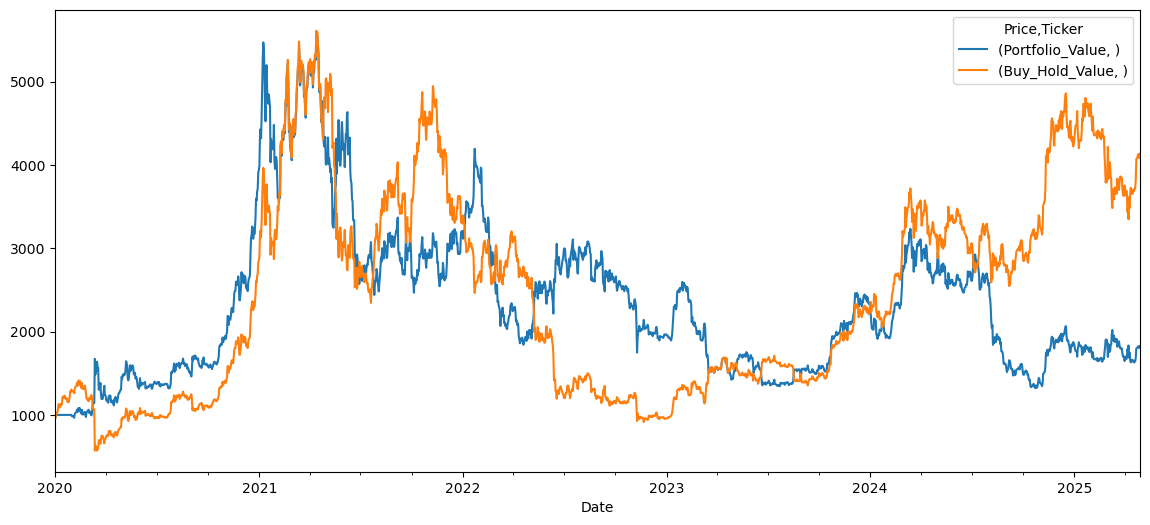

In [47]:
btc[['Portfolio_Value', 'Buy_Hold_Value']].plot(figsize=(14,6))
plt.show()

In [48]:
import backtrader as bt
import datetime

In [49]:
# Step 1: Define Strategy
class SmaCross(bt.Strategy):
    params = dict(pfast=7, pslow=30)  # fast and slow SMA periods

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)
        sma2 = bt.ind.SMA(period=self.p.pslow)
        self.crossover = bt.ind.CrossOver(sma1, sma2)

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # golden cross
                self.buy()
        elif self.crossover < 0:  # death cross
            self.sell()


In [50]:
import backtrader as bt
import yfinance as yf

# --- Step 1: Download BTC Data as DataFrame ---
btc_df = yf.download("BTC-USD", start="2020-01-01", end="2024-12-31")
btc_df.dropna(inplace=True)  # Clean NA values

# --- Step 2: Define Strategy ---
class SmaCross(bt.Strategy):
    params = dict(pfast=7, pslow=30)

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)
        sma2 = bt.ind.SMA(period=self.p.pslow)
        self.crossover = bt.ind.CrossOver(sma1, sma2)

    def next(self):
        if not self.position and self.crossover > 0:
            self.buy()
        elif self.position and self.crossover < 0:
            self.sell()

# --- Step 3: Convert to Backtrader DataFeed ---
# 🚨 Make sure `dataname=btc_df`, NOT a tuple like (btc_df,)
data = bt.feeds.PandasData(dataname=btc_df)

# --- Step 4: Backtrader Engine ---
cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)
cerebro.adddata(data)
cerebro.broker.setcash(10000)
cerebro.addsizer(bt.sizers.FixedSize, stake=1)
cerebro.broker.setcommission(commission=0.001)

# --- Step 5: Run and Plot ---
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.plot()


[*********************100%***********************]  1 of 1 completed

Starting Portfolio Value: 10000.00


AttributeError: 'tuple' object has no attribute 'lower'

In [51]:
!pip install backtrader

In [52]:
import backtrader as bt
import yfinance as yf

# ✅ Download BTC data as a DataFrame
btc_df = yf.download("BTC-USD", start="2020-01-01", end="2024-12-31")
btc_df.dropna(inplace=True)

# ✅ Check type (important in Jupyter)
print("TYPE:", type(btc_df))  # Should say <class 'pandas.core.frame.DataFrame'>

# ✅ Define Strategy
class SmaCross(bt.Strategy):
    params = dict(pfast=7, pslow=30)

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)
        sma2 = bt.ind.SMA(period=self.p.pslow)
        self.crossover = bt.ind.CrossOver(sma1, sma2)

    def next(self):
        if not self.position and self.crossover > 0:
            self.buy()
        elif self.position and self.crossover < 0:
            self.sell()

# ✅ Convert to Backtrader data feed (MUST NOT BE A TUPLE!)
data = bt.feeds.PandasData(dataname=btc_df)

# ✅ Backtrader engine
cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)
cerebro.adddata(data)
cerebro.broker.setcash(10000)
cerebro.addsizer(bt.sizers.FixedSize, stake=1)
cerebro.broker.setcommission(commission=0.001)

# ✅ Run and plot
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.plot()


[*********************100%***********************]  1 of 1 completed

TYPE: <class 'pandas.core.frame.DataFrame'>
Starting Portfolio Value: 10000.00


AttributeError: 'tuple' object has no attribute 'lower'